In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pyreadr
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import dates

In [4]:
df = pyreadr.read_r('vps_2020-2021_7HPE-Standspeed-depth-temp-bottomVsurface-DOY-substrate_dist_region_clean_250m100mGridIDs_TG.rds')
df = df[None]
df.head()

PolygonID_250m    shark    Transmitter         DateTimeUTC        X  \
0              1  2020-20  A69-9006-7853 2020-05-23 12:04:29  3523.98   
1              1  2020-20  A69-9006-7853 2020-05-23 12:04:29  3523.98   
2              1  2020-20  A69-9006-7853 2020-05-23 12:04:29  3523.98   
3              1  2020-20  A69-9006-7853 2020-05-23 12:04:29  3523.98   
4              1  2020-20  A69-9006-7853 2020-05-23 12:04:29  3523.98   

         Y      lat       lon  HPE    temp_c  ...  Center_Longitude  \
0  5866.94  34.4069 -119.5653  6.2  13.74344  ...          34.40675   
1  5866.94  34.4069 -119.5653  6.2  13.74344  ...          34.40675   
2  5866.94  34.4069 -119.5653  6.2  13.74344  ...          34.40675   
3  5866.94  34.4069 -119.5653  6.2  13.74344  ...          34.40675   
4  5866.94  34.4069 -119.5653  6.2  13.74344  ...          34.40675   

    NEAR_DIST Region_Occupied temp_bin depth_bin2m  Center_Longitude_250m  \
0  837.319936  Offshore_gte5m   13-14C        2-3m            -119.568538   
1  837.319936  Offshore_gte5m   13-14C        2-3m            -119.568538   
2  837.319936  Offshore_gte5m   13-14C        2-3m            -119.568538   
3  837.319936  Offshore_gte5m   13-14C        2-3m            -119.568538   
4  837.319936  Offshore_gte5m   13-14C        2-3m            -119.568538   

  Center_Latitude_250m   roundedDateTimePT  tg_depth_m  relativePostionTG  
0             34.40801 2020-05-23 12:00:00    0.987352              below  
1             34.40801 2020-05-23 12:00:00    0.987352              below  
2             34.40801 2020-05-23 12:00:00    0.987352              below  
3             34.40801 2020-05-23 12:00:00    0.987352              below  
4             34.40801 2020-05-23 12:00:00    0.987352              below  

[5 rows x 45 columns]

In [71]:
df_hfb = df.loc[df['HFB_m'] >= 0]
df_hfb['DateTimeUTC'] = pd.to_datetime(df_hfb['DateTimeUTC'], utc=True)

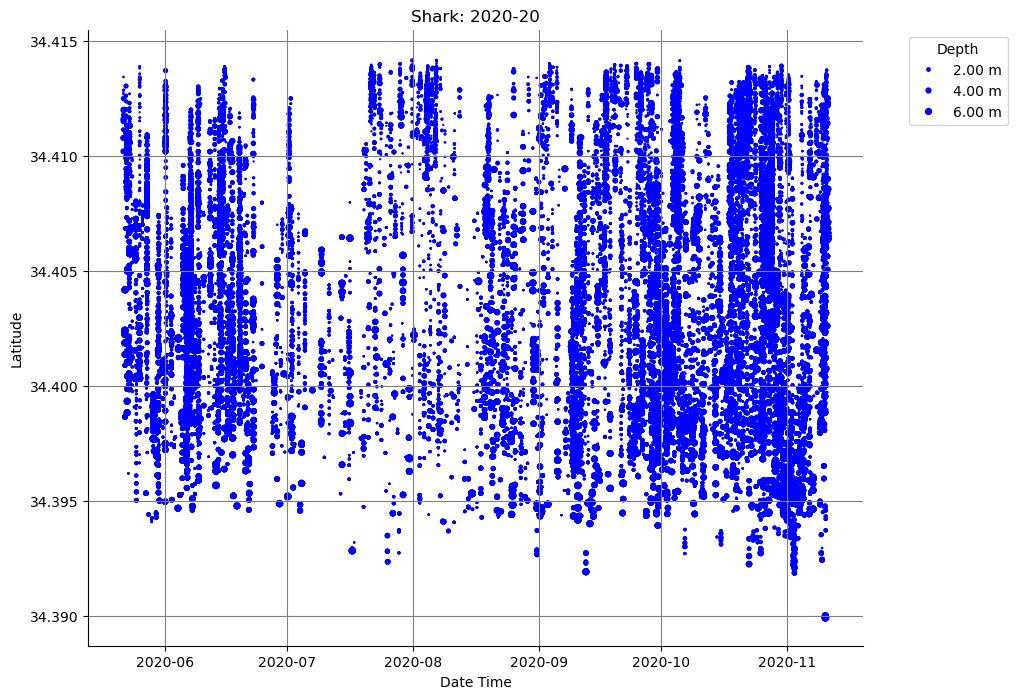

In [75]:
shark = '2020-20'

size_factor = 3
sizes = df_hfb['depth_m'].loc[(df_hfb['shark']==shark)]*size_factor
fig, ax = plt.subplots(figsize=(10,8))


sc = plt.scatter(df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==shark)], df_hfb['lat'].loc[(df_hfb['shark']==shark)], s=sizes, color='b' )
kw = dict(prop="sizes", num=5, color='b', fmt="{x:.2f} m", func=lambda s: s/(size_factor))
legend2 = ax.legend(*sc.legend_elements(**kw), bbox_to_anchor=(1.05,1), title='Depth')   
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.ylabel('Latitude')
plt.xlabel('Date Time')
plt.grid()
plt.title('Shark: %s' % shark)
plt.show()

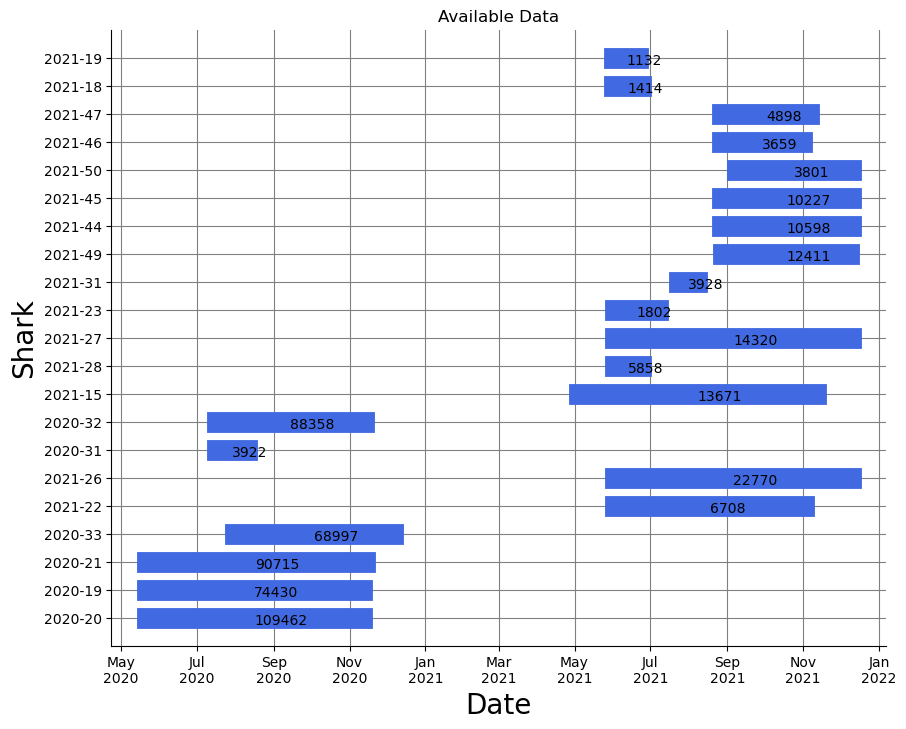

In [76]:

fig, ax = plt.subplots(figsize=(10,8))
sharks = df_hfb['shark'].unique()
sharks = np.delete(sharks, np.where(sharks=='2021-20'))
data_count = np.zeros(len(sharks))

for i in range(len(sharks)):
    b = df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks[i])].min() # Start of data
    e = df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks[i])].max() # End of data
    m = b + (e-b)/2 # Mid point of data (for plotting number of data points)
    count_ = len(df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks[i])])
    data_count[i] = count_
    ax.plot_date([b, e], [i+1]*2, ls='-', lw=15, color='royalblue')
    plt.text(x=m, y=i+.75, s=str(count_))
    
    
# Set ticks and labels on y axis
ax.set_yticks(range(1, len(sharks) + 1))
ax.set_yticklabels(sharks)
plt.title('Available Data')
plt.ylabel('Shark', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Set color and transparency of the grid
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# activate grid
ax.grid(True)

In [77]:
df_hfb['Time']=pd.to_datetime(df['DateTimeUTC']).dt.hour
df_hfb['month'] = df_hfb['DateTimeUTC'].dt.month
df_hfb['Time'] = pd.to_datetime(df_hfb['DateTimePT']).dt.hour
df_hfb['substrate'] = df_hfb['substrate'].astype('category')
df_hfb['substrate_num'] = df_hfb['substrate'].cat.codes
df_hfb[['Region_Occupied', 'sex']] = df_hfb[['Region_Occupied', 'sex']].astype('category')
df_hfb['Region_code'] = df_hfb['Region_Occupied'].cat.codes
df_hfb['sex_code'] = df_hfb['sex'].cat.codes

In [58]:
for column in df_hfb.columns:
    print(column)

PolygonID_250m
shark
Transmitter
DateTimeUTC
X
Y
lat
lon
HPE
temp_c
depth_m
Tag_family
when_encountered
tag_location
sex
TNL_cm
est_tag_expiry_date
DateTimePT
elaspsed_time_s_
Dist_m_
velocity_ms
Total_Water_Column_m
HFB_m
Date
Time
month
year
depth_bin
Water_col_position
substrate
PolygonID
DOY
size_range_corrected
Center_Total_Water_Column_m
Center_Latitude
Center_Longitude
NEAR_DIST
Region_Occupied
temp_bin
depth_bin2m
Center_Longitude_250m
Center_Latitude_250m
roundedDateTimePT
tg_depth_m
relativePostionTG
substrate_num
Region_code
sex_code


In [63]:
drop_columns = ['Transmitter', 
                'X',
                'Y',
                'lat', 
                'lon', 
                'HPE',
                'Tag_family',
                'when_encountered',
                'tag_location',
                'est_tag_expiry_date',
                'DateTimePT',
                'elaspsed_time_s_',
                'PolygonID',
                'Center_Total_Water_Column_m',
                'Center_Latitude',
                'Center_Longitude',
                'Center_Longitude_250m',
                'Center_Latitude_250m',
                'roundedDateTimePT']
df_hfb.drop(columns=drop_columns, inplace=True)
df_hfb.head()

PolygonID_250m    shark               DateTimeUTC    temp_c  depth_m sex  \
0              1  2020-20 2020-05-23 12:04:29+00:00  13.74344   3.7899   M   
1              1  2020-20 2020-05-23 12:04:29+00:00  13.74344   3.7899   M   
2              1  2020-20 2020-05-23 12:04:29+00:00  13.74344   3.7899   M   
3              1  2020-20 2020-05-23 12:04:29+00:00  13.74344   3.7899   M   
4              1  2020-20 2020-05-23 12:04:29+00:00  13.74344   3.7899   M   

   TNL_cm  Dist_m_  velocity_ms  Total_Water_Column_m  ...  \
0   155.0      NaN          NaN                  8.97  ...   
1   155.0      NaN          NaN                  8.97  ...   
2   155.0      NaN          NaN                  8.97  ...   
3   155.0      NaN          NaN                  8.97  ...   
4   155.0      NaN          NaN                  8.97  ...   

   size_range_corrected   NEAR_DIST  Region_Occupied  temp_bin depth_bin2m  \
0             125-175cm  837.319936   Offshore_gte5m    13-14C        2-3m   
1             125-175cm  837.319936   Offshore_gte5m    13-14C        2-3m   
2             125-175cm  837.319936   Offshore_gte5m    13-14C        2-3m   
3             125-175cm  837.319936   Offshore_gte5m    13-14C        2-3m   
4             125-175cm  837.319936   Offshore_gte5m    13-14C        2-3m   

  tg_depth_m relativePostionTG substrate_num  Region_code sex_code  
0   0.987352             below             1            1        1  
1   0.987352             below             1            1        1  
2   0.987352             below             1            1        1  
3   0.987352             below             1            1        1  
4   0.987352             below             1            1        1  

[5 rows x 29 columns]

In [53]:
from pandas.plotting import scatter_matrix 
import seaborn as sns

In [78]:
sharks_20 = df_hfb.loc[df_hfb['year']=='2020']

/Users/kevinabbott/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


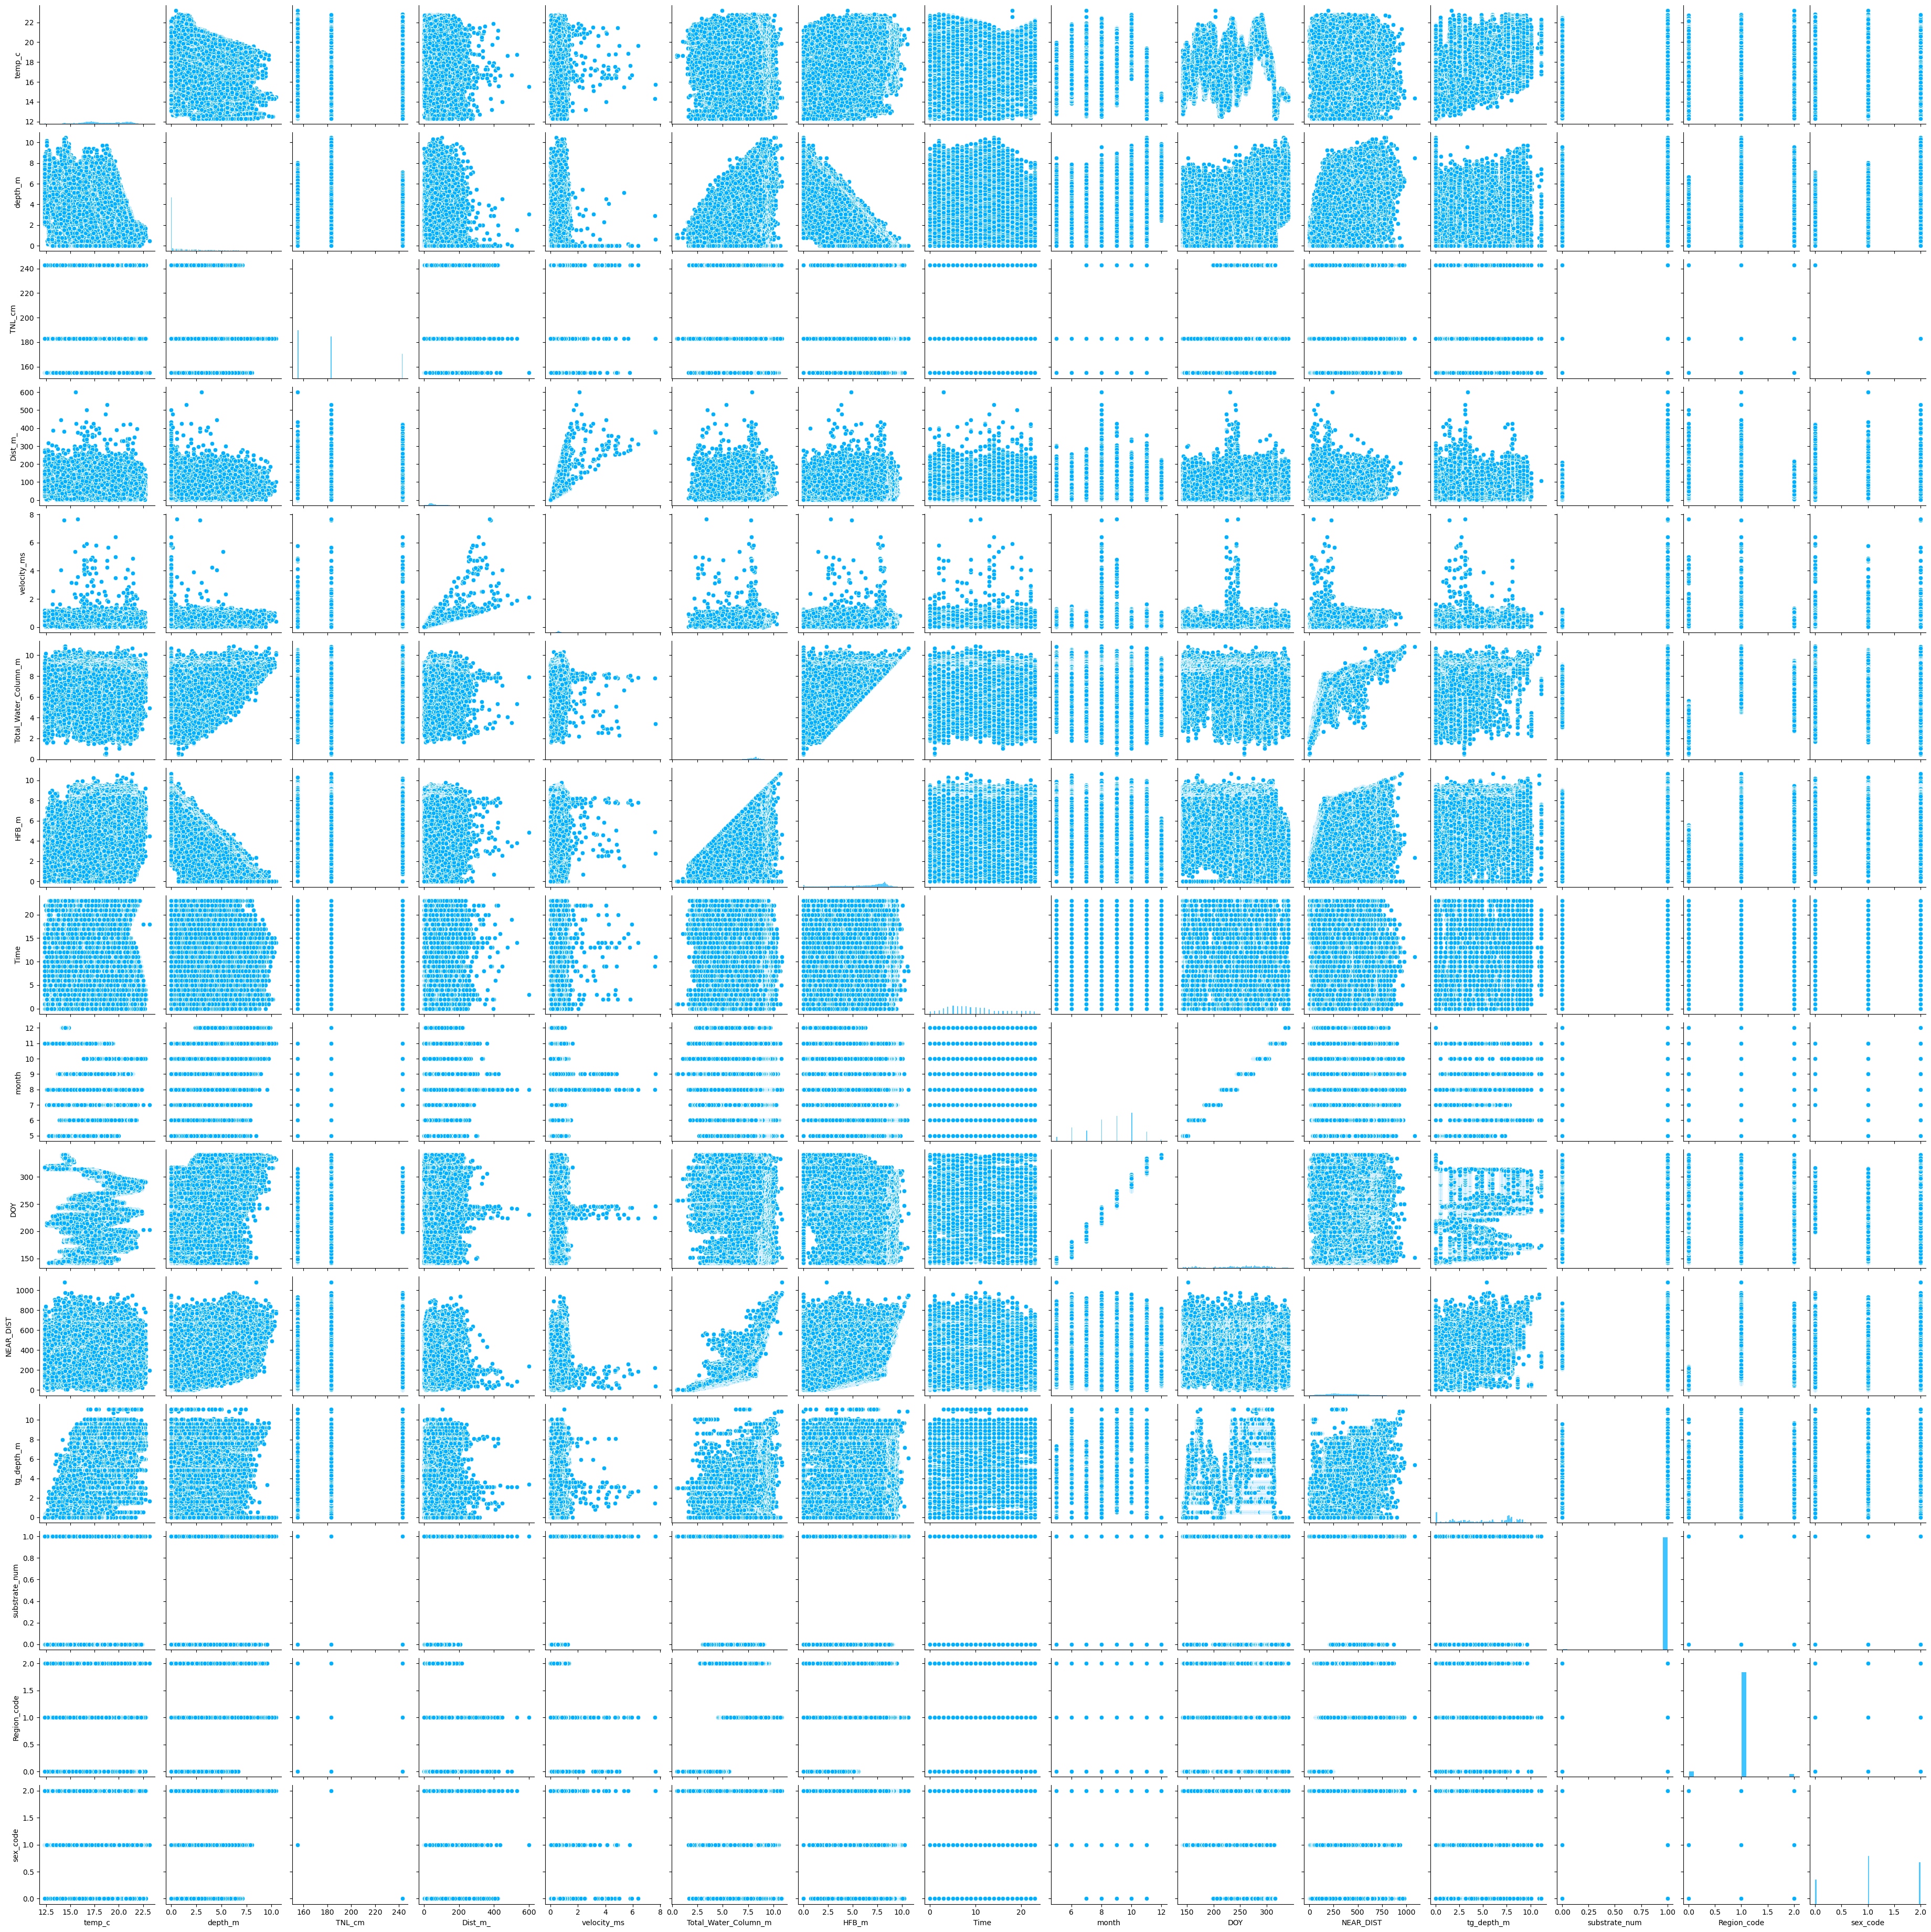

In [65]:
sns.pairplot(sharks_20)

In [80]:
df_hfb.columns

Index(['PolygonID_250m', 'shark', 'Transmitter', 'DateTimeUTC', 'X', 'Y',
       'lat', 'lon', 'HPE', 'temp_c', 'depth_m', 'Tag_family',
       'when_encountered', 'tag_location', 'sex', 'TNL_cm',
       'est_tag_expiry_date', 'DateTimePT', 'elaspsed_time_s_', 'Dist_m_',
       'velocity_ms', 'Total_Water_Column_m', 'HFB_m', 'Date', 'Time', 'month',
       'year', 'depth_bin', 'Water_col_position', 'substrate', 'PolygonID',
       'DOY', 'size_range_corrected', 'Center_Total_Water_Column_m',
       'Center_Latitude', 'Center_Longitude', 'NEAR_DIST', 'Region_Occupied',
       'temp_bin', 'depth_bin2m', 'Center_Longitude_250m',
       'Center_Latitude_250m', 'roundedDateTimePT', 'tg_depth_m',
       'relativePostionTG', 'substrate_num', 'Region_code', 'sex_code'],
      dtype='object')

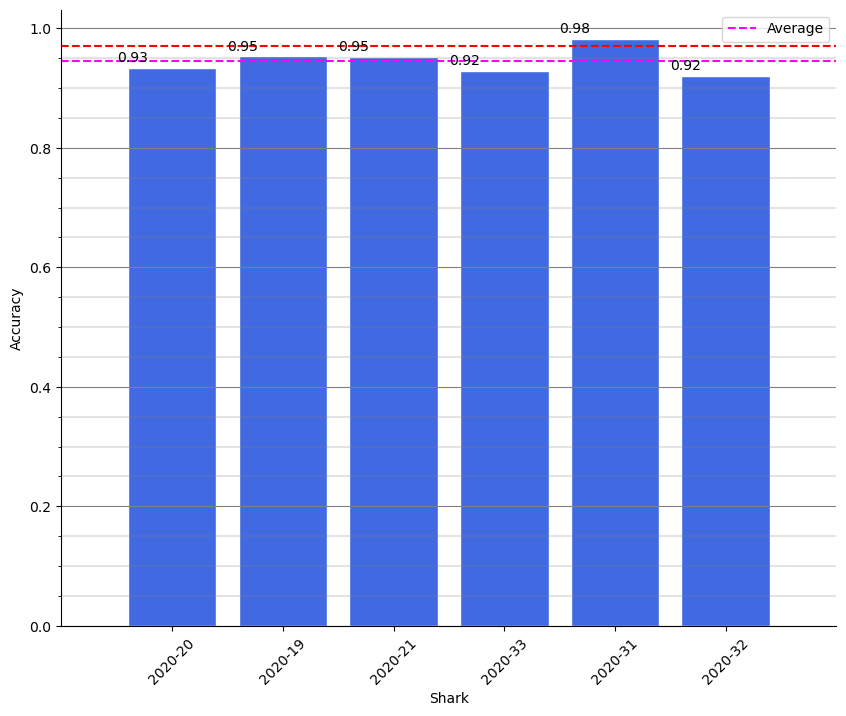

0.945199043264937


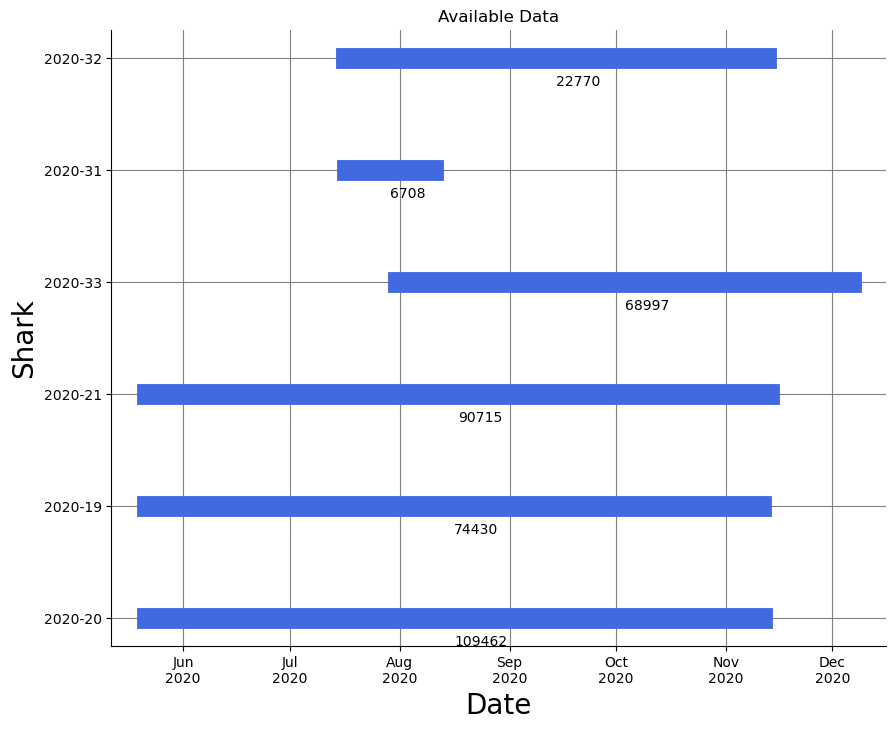

In [83]:
sharks_20 = df_hfb['shark'].loc[df_hfb['year']=='2020'].unique()

caution_val = .97

acc_ = np.zeros(len(sharks_20))

fig, ax = plt.subplots(figsize=(10,8))

low_shark = []
low_value = 0.75
high_shark = []

for i in range(len(sharks_20)):
    X = df_hfb[['temp_c', 'Time', 'DOY']].loc[(df_hfb['shark']==sharks_20[i])] # Training Variables
    y = df_hfb['Region_code'].loc[(df_hfb['shark']==sharks_20[i])] # Prediction Variables
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6) # 40 percent test size (can change)
    
    clf = DecisionTreeClassifier(max_depth=10)
    clf.fit(x_train.values, y_train.values)
    y_predict = clf.predict(x_test.values)
    acc = accuracy_score(y_test.values, y_predict)
    if acc <= low_value:
        low_shark.append(sharks_20[i])
    if acc>= caution_val:
        high_shark.append(sharks_20[i])
    acc_[i] = acc
    plt.bar(sharks_20[i], acc, color='royalblue')
    plt.text(i-0.5, acc+.01, '%.4s' %acc)
    #print("Accuracy for Decision Tree Classifier on shark %s is %s" % (df_hfb['shark'].unique()[i], acc))
plt.plot([-1, 6], [caution_val, caution_val], ls='--', color='red')
plt.plot([-1, 6], [np.mean(acc_),np.mean(acc_)], ls='--', color='magenta', label='Average')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Shark')
plt.xlim((-1, 6))
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(axis='y')
plt.legend()
ax.grid(visible=True, which='minor', linewidth=0.3)
plt.show()

    
print(np.mean(acc_))

fig, ax = plt.subplots(figsize=(10,8))
#sharks = df_hfb['shark'].unique()
#sharks = np.delete(sharks, np.where(sharks=='2021-20'))
data_count = np.zeros(len(sharks))

for i in range(len(sharks_20)):
    b = df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks_20[i])].min() # Start of data
    e = df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks_20[i])].max() # End of data
    m = b + (e-b)/2 # Mid point of data (for plotting number of data points)
    count_ = len(df_hfb['DateTimeUTC'].loc[(df_hfb['shark']==sharks[i])])
    data_count[i] = count_
    if sharks[i] in low_shark:
        ax.plot_date([b, e], [i+1]*2, ls='-', lw=15, color='tomato')
    elif sharks[i] in high_shark:
        ax.plot_date([b, e], [i+1]*2, ls='-', lw=15, color='olivedrab')
    else:
        ax.plot_date([b, e], [i+1]*2, ls='-', lw=15, color='royalblue')
    plt.text(x=m, y=i+.75, s=str(count_))
    
    
# Set ticks and labels on y axis
ax.set_yticks(range(1, len(sharks_20) + 1))
ax.set_yticklabels(sharks_20)
plt.title('Available Data')
plt.ylabel('Shark', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Set color and transparency of the grid
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# activate grid
ax.grid(True)